# Welcome! This is Antonio Cervantes and Christian Pedrigal's Machine Learning Final Project!

## Implementation of an Activity Detection System

#### Fall 2021 | Feruza Amirkulova ME 297-01 | Introduction to Optimization and Machine Learning |San Jose State University


#### Imports

In [69]:
import os
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Input

Data file should be in the format of

feature1, feature2, feature3,... featureN, activity_label

Features can be from any number of XYZ axes and from either or all sensors decided by engineers, but be sure to note which order they are placed in, and the order of the sensor type.

In [2]:
datafile = read_csv(r'.\data\finalData20211202.csv', header=0)
dataset = datafile.values

##### Visualize the Data

In [63]:
datafile

,AngFreqX,AngFreqY,AngFreqZ,AmpX,AmpY,AmpZ,JerkX,JerkY,JerkZ,LabelCol
0,0.199203,0.199203,0.199203,2.585287,0.913442,1.802900,41.77815,129.21880,72.65140,Bike
1,0.597610,0.597610,0.000000,3.329810,3.091933,2.349788,43.29745,16.30860,55.21265,Bike
2,0.597610,0.996016,0.000000,4.233957,3.157124,3.638205,2.00000,2.00000,48.67130,Bike
3,0.199203,0.996016,0.000000,1.001800,3.220194,2.941837,2.00000,24.96060,16.57805,Bike
4,0.398406,0.199203,0.000000,1.961231,3.002603,0.444325,26.70445,7.56675,2.05000,Bike
...,...,...,...,...,...,...,...,...,...,...
2445,0.948587,0.948587,0.000000,3.136291,3.582446,2.566307,2.00000,17565.71560,17463.29110,Walk
2446,0.996016,0.996016,0.000000,3.138745,3.620830,2.497816,79.63440,17841.84640,17887.60625,Walk
2447,0.996016,0.996016,0.000000,3.122694,3.752028,2.644596,17708.37645,2.05000,17486.68745,Walk
2448,0.996016,0.996016,0.000000,3.192397,3.699486,2.599819,17392.08415,17553.44860,68.84935,Walk


In [ ]:
dataset[0]

In [91]:
feature_names = list(datafile.columns.values)

##### Parse the data and labels

In [3]:
data = dataset[:,0:9].astype(float)
labels = dataset[:,9]

In [4]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)

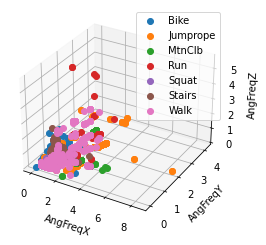

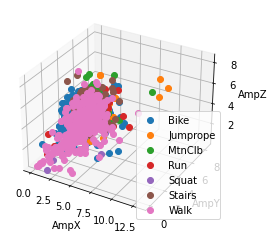

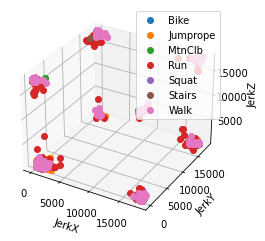

In [107]:
from mpl_toolkits import mplot3d
x = np.arange(1,len(labels)+1)

# Angle Frequency
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(dataset[0:357,0],dataset[0:357,1],dataset[0:357,2], linestyle='none', marker='o', label='Bike')
ax.plot3D(dataset[358:741,0],dataset[358:741,1],dataset[358:741,2], linestyle='none', marker='o', label='Jumprope')
ax.plot3D(dataset[742:952,0],dataset[742:952,1],dataset[742:952,2], linestyle='none', marker='o', label='MtnClb')
ax.plot3D(dataset[953:1210,0],dataset[953:1210,1],dataset[953:1210,2], linestyle='none', marker='o', label='Run')
ax.plot3D(dataset[1211:1469,0],dataset[1211:1469,1],dataset[1211:1469,2], linestyle='none', marker='o', label='Squat')
ax.plot3D(dataset[1470:1561,0],dataset[1470:1561,1],dataset[1470:1561,2], linestyle='none', marker='o', label='Stairs')
ax.plot3D(dataset[1562:2451,0],dataset[1562:2451,1],dataset[1562:2451,2], linestyle='none', marker='o', label='Walk')
plt.legend()
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2]);

# Amplitude
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(dataset[0:357,3],dataset[0:357,4],dataset[0:357,5], linestyle='none', marker='o', label='Bike')
ax.plot3D(dataset[358:741,3],dataset[358:741,4],dataset[358:741,5], linestyle='none', marker='o', label='Jumprope')
ax.plot3D(dataset[742:952,3],dataset[742:952,4],dataset[742:952,5], linestyle='none', marker='o', label='MtnClb')
ax.plot3D(dataset[953:1210,3],dataset[953:1210,4],dataset[953:1210,5], linestyle='none', marker='o', label='Run')
ax.plot3D(dataset[1211:1469,3],dataset[1211:1469,4],dataset[1211:1469,5], linestyle='none', marker='o', label='Squat')
ax.plot3D(dataset[1470:1561,3],dataset[1470:1561,4],dataset[1470:1561,5], linestyle='none', marker='o', label='Stairs')
ax.plot3D(dataset[1562:2451,3],dataset[1562:2451,4],dataset[1562:2451,5], linestyle='none', marker='o', label='Walk')
plt.legend()
ax.set_xlabel(feature_names[3])
ax.set_ylabel(feature_names[4])
ax.set_zlabel(feature_names[5]);

# Jerk
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(dataset[0:357,6],dataset[0:357,7],dataset[0:357,8], linestyle='none', marker='o', label='Bike')
ax.plot3D(dataset[358:741,6],dataset[358:741,7],dataset[358:741,8], linestyle='none', marker='o', label='Jumprope')
ax.plot3D(dataset[742:952,6],dataset[742:952,7],dataset[742:952,8], linestyle='none', marker='o', label='MtnClb')
ax.plot3D(dataset[953:1210,6],dataset[953:1210,7],dataset[953:1210,8], linestyle='none', marker='o', label='Run')
ax.plot3D(dataset[1211:1469,6],dataset[1211:1469,7],dataset[1211:1469,8], linestyle='none', marker='o', label='Squat')
ax.plot3D(dataset[1470:1561,6],dataset[1470:1561,7],dataset[1470:1561,8], linestyle='none', marker='o', label='Stairs')
ax.plot3D(dataset[1562:2451,6],dataset[1562:2451,7],dataset[1562:2451,8], linestyle='none', marker='o', label='Walk')
plt.legend()
ax.set_xlabel(feature_names[6])
ax.set_ylabel(feature_names[7])
ax.set_zlabel(feature_names[8]);

Debug

In [8]:
data.shape

(2450, 9)

In [61]:
labels.shape

(2450,)

In [62]:
enumerate(labels)

In [53]:
encoded_labels.shape

(2450,)

# Learning

#### Method 1: Using model.fit

In [102]:
# Create the model      , input_shape=(2450,9)
model = Sequential()
model.add(Dense(9, input_dim=1, activation='relu'))
#model.add(Dropout())
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 9)                 18        
_________________________________________________________________
dense_42 (Dense)             (None, 9)                 90        
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
# Fit the model
model.fit(encoded_labels, data, validation_split=0.33, epochs=150, batch_size=50)

Epoch 1/150
33/33 [==============================] - 1s 15ms/step - loss: 17995.9551 - accuracy: 0.4016 - val_loss: 16402.8164 - val_accuracy: 0.3164
Epoch 2/150
33/33 [==============================] - 0s 5ms/step - loss: 17655.6426 - accuracy: 0.4046 - val_loss: 16642.0352 - val_accuracy: 0.3164
Epoch 3/150
33/33 [==============================] - 0s 4ms/step - loss: 17466.3789 - accuracy: 0.4046 - val_loss: 17046.7949 - val_accuracy: 0.3164
Epoch 4/150
33/33 [==============================] - 0s 4ms/step - loss: 17530.3574 - accuracy: 0.4046 - val_loss: 17866.5000 - val_accuracy: 0.3164
Epoch 5/150
33/33 [==============================] - 0s 4ms/step - loss: 17647.8555 - accuracy: 0.4046 - val_loss: 18572.5039 - val_accuracy: 0.3164
Epoch 6/150
33/33 [==============================] - 0s 5ms/step - loss: 17827.8301 - accuracy: 0.4046 - val_loss: 19340.0117 - val_accuracy: 0.3164
Epoch 7/150
33/33 [==============================] - 0s 4ms/step - loss: 18029.1074 - accuracy: 0.4046 - 

33/33 [==============================] - 0s 5ms/step - loss: 213036.3125 - accuracy: 0.0012 - val_loss: 355706.9375 - val_accuracy: 0.0309
Epoch 110/150
33/33 [==============================] - 0s 4ms/step - loss: 216713.4844 - accuracy: 0.0012 - val_loss: 361301.9375 - val_accuracy: 0.0309
Epoch 111/150
33/33 [==============================] - 0s 4ms/step - loss: 220850.7812 - accuracy: 0.0012 - val_loss: 367092.5312 - val_accuracy: 0.0309
Epoch 112/150
33/33 [==============================] - 0s 4ms/step - loss: 224721.9531 - accuracy: 0.0018 - val_loss: 376846.6875 - val_accuracy: 0.0309
Epoch 113/150
33/33 [==============================] - 0s 4ms/step - loss: 227948.6094 - accuracy: 0.0024 - val_loss: 379672.8125 - val_accuracy: 0.0309
Epoch 114/150
33/33 [==============================] - 0s 4ms/step - loss: 232792.4375 - accuracy: 0.0012 - val_loss: 389352.6250 - val_accuracy: 0.0309
Epoch 115/150
33/33 [==============================] - 0s 4ms/step - loss: 236299.7969 - accurac

#### Method 2: Using KerasClassifier, KFold, and cross_val_score (in the next section)

In [108]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_labels = to_categorical(encoded_labels)

In [109]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(9, input_dim=1, activation='relu'))
	model.add(Dense(9, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [116]:
# Create Estimator
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=1, verbose=0)

Debug

In [ ]:
dummy_labels

In [113]:
dummy_labels.shape

(2450, 7)

# Evaluation

#### Evaluation for Method 2

In [111]:
kfold = KFold(n_splits=10, shuffle=True)

In [117]:
results = cross_val_score(estimator, data, dummy_labels, cv=kfold, error_score='raise')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: in user code:

    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_24 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (1, 9)


# Debug
Run these cells only if you need to debug

Show NN input types and size

In [15]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 9) <dtype: 'float32'>
(None, 4) <dtype: 'float32'>
dense_4 (None, 9) float32
dense_5 (None, 12) float32


[None, None]